### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("train.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(20)

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1
5,2692,Women Pink Flats Sandal,4.1,Women,Flipkart,359,499,28.06%,274.0,25.0,153.0,49.0,34.0,15,23,0
6,3236,Women Navy Heels Sandal,4.0,Women,Flipkart,499,999,50.05%,249.0,31.0,130.0,52.0,27.0,9,28,1
7,14633,Women Blue Wedges Sandal,3.9,Women,Flipkart,209,1299,83.91%,121.0,17.0,63.0,25.0,14.0,9,12,0
8,1872,Sneakers For Women (Pink),4.2,Women,Flipkart,549,999,45.05%,191.0,30.0,120.0,25.0,31.0,7,12,1
9,1668,"Men Black, Beige Sandal",4.1,Men,Flipkart,809,899,10.01%,36126.0,5028.0,18688.0,9899.0,3709.0,1272,2558,0


In [4]:
df.shape

(15730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [6]:
# There is no significance of keeping id, and offer(%) columns in dataset, therefore removing these columns.
df.drop(columns=['id','Offer %'],inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(12146, 14)

In [9]:
df.describe()

,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,12146.000000,12146.000000,12146.000000,11470.000000,11570.000000,11560.000000,11608.000000,11915.000000,12146.000000,12146.000000,12146.000000
mean,4.013404,686.098551,1375.208464,3133.618832,433.690579,1614.651038,671.278515,367.815191,159.684341,282.424255,0.602338
std,0.297640,656.845549,1251.216150,12263.105583,1835.598768,6367.243061,2970.722922,1452.210048,579.489444,989.539144,0.489435
min,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000,349.000000,699.000000,66.000000,9.000000,31.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,4.000000,474.000000,999.000000,306.500000,43.000000,151.000000,60.000000,34.000000,17.000000,29.000000,1.000000
75%,4.200000,679.000000,1299.000000,1544.500000,215.000000,790.000000,308.000000,173.000000,78.000000,141.000000,1.000000
max,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


### Exploratory Data Analysis

In [10]:
x = df.drop(columns=['price1'])
y = df['price1']

In [11]:
num_feature = x.select_dtypes(include=np.number).columns.tolist()
num_feature

['Rating',
 'actprice1',
 'norating1',
 'noreviews1',
 'star_5f',
 'star_4f',
 'star_3f',
 'star_2f',
 'star_1f',
 'fulfilled1']

In [12]:
cat_feature = x.select_dtypes(include='object').columns.tolist()
cat_feature

['title', 'maincateg', 'platform']

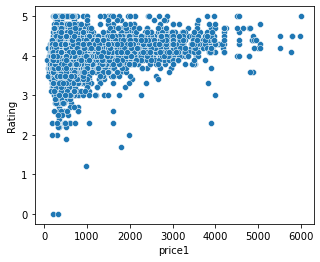

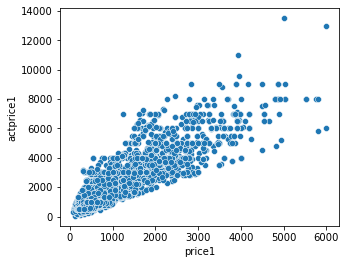

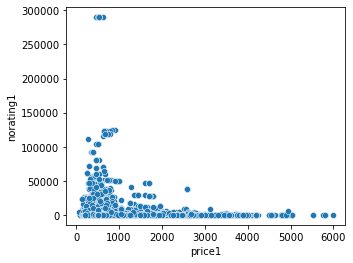

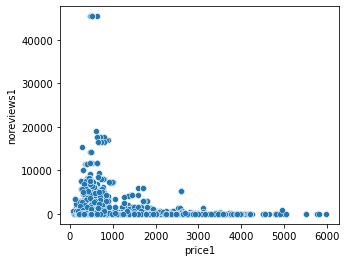

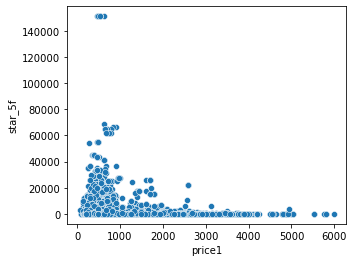

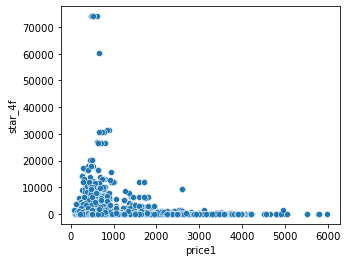

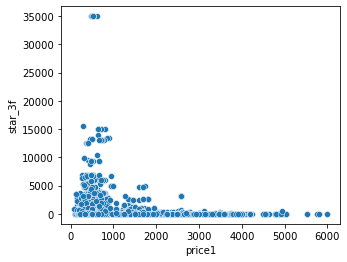

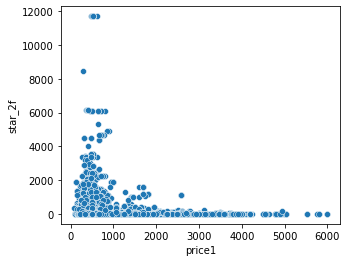

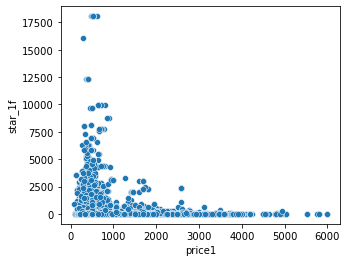

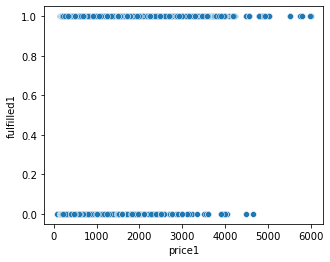

In [13]:
for feature in num_feature:
    f = plt.figure()
    f.set_figwidth(5)
    f.set_figheight(4)
    sns.scatterplot(x=df['price1'],y=df[feature])
    plt.show()

One thing we can conclude from above graphs is - as there is an increase in actual price, discounted price is also increasing.

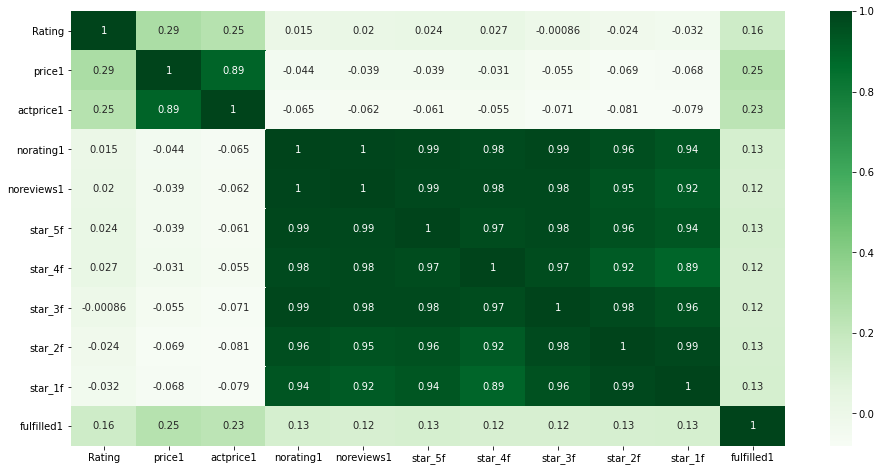

In [14]:
fig=plt.figure(figsize=(16, 8))
corr_mat = df.corr()
sns.heatmap(corr_mat,cmap='Greens',annot=True);

All features are very weakly negatively correlated with target variable except Rating, fulfilled1 (positively correlated) and actprice1 (very highly positively correlated).

Flipkart    0.982299
Amazon      0.017701
Name: platform, dtype: float64


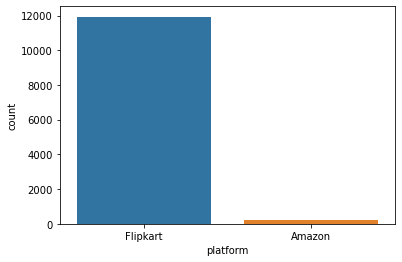

In [15]:
sns.countplot(x=df['platform']);
print(df['platform'].value_counts(normalize=True))

Flipkart usage is 98.22 % as compared to amazon which has been used only 1.77 %

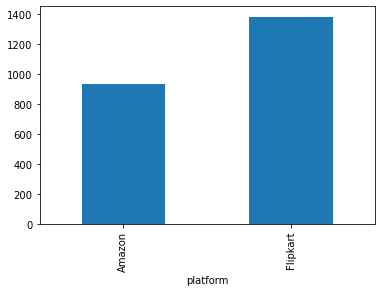

In [16]:
avg_pr = df['actprice1'].groupby(df['platform']).mean()
avg_pr.plot(kind='bar');

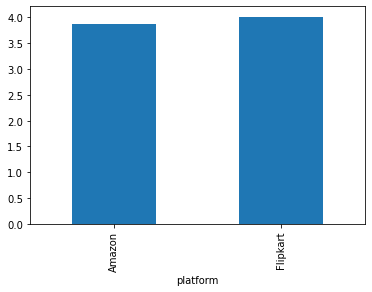

In [17]:
avg_rat = df['Rating'].groupby(df['platform']).mean()
avg_rat.plot(kind='bar');

Average prices for the products sold on flipkart and amazon doesnt have any large difference and same goes for average rating. Therefore, there is no significant reason for more usage of flipkart platform than amazon.

Women    0.589622
Men      0.410378
Name: maincateg, dtype: float64


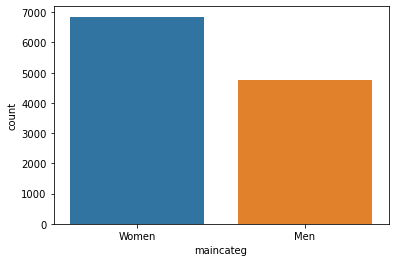

In [18]:
sns.countplot(x=df['maincateg'])
print(df['maincateg'].value_counts(normalize=True))

Products available for women are more than men which is 58.96 % and 41.03 % of men.

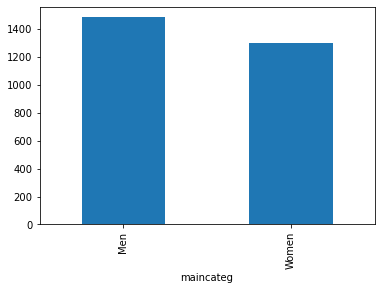

In [19]:
avg_prices = df['actprice1'].groupby(df['maincateg']).mean()
avg_prices.plot(kind='bar');

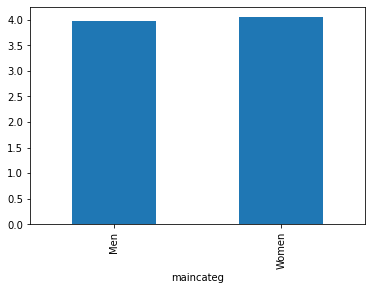

In [20]:
avg_rating = df['Rating'].groupby(df['maincateg']).mean()
avg_rating.plot(kind='bar');

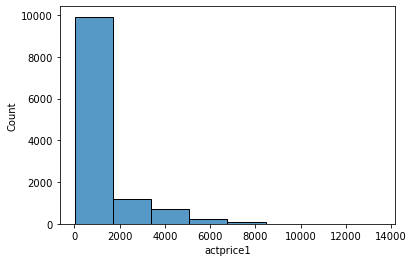

In [21]:
sns.histplot(data=df,x=df['actprice1'],bins=8);

Very high number of products are avaialble in the price range of 0-1900 compared to other ranges.

### Feature Engineering

In [22]:
x = df.drop(columns=['price1'])
y = df['price1']

In [23]:
x.shape, y.shape

((12146, 13), (12146,))

In [24]:
train, test = train_test_split(df, test_size=0.15, random_state=42)

In [25]:
train.shape, test.shape

((10324, 14), (1822, 14))

In [26]:
# Imputing missing values with mean of their respective columns.
def mis_val(data):
    data['star_5f'] = data['star_5f'].fillna(data['star_5f'].median())
    data['star_4f'] = data['star_4f'].fillna(data['star_4f'].median())
    data['star_3f'] = data['star_3f'].fillna(data['star_3f'].median())

In [27]:
#Imputing missing values of norating1 with sum of star ratings
def mis_norat(data):
    data['norating1']=data[data['norating1'].isna()]['norating1']=data['star_5f']+data['star_4f']+data['star_3f']+data['star_2f']+data['star_1f']

In [28]:
# Assigning maincateg according to the title name as much as possible and deleting rest of the rows having NaN values.
def mis_maincat(data):
    data.loc[(data['maincateg'].isna()) & data['title'].str.contains('Women',case=False),'maincateg']='Women'
    data.loc[(data['maincateg'].isna()) & data['title'].str.contains('Men',case=True),'maincateg']='Men'
    data.dropna(subset=['maincateg'],inplace=True)

In [29]:
# Assigning missing values of norating1 with median of all the star ratings.
def mis_norev(data):
    data.loc[(data['noreviews1'].isna()),'noreviews1'] = data.loc[:,["star_5f","star_4f","star_3f","star_2f","star_1f"]].median(axis=1)

In [30]:
mis_val(train)
mis_norat(train)
mis_maincat(train)
mis_norev(train)
train.drop(columns=['title'],inplace=True)
test['star_5f'] = test['star_5f'].fillna(train['star_5f'].median())
test['star_4f'] = test['star_4f'].fillna(train['star_4f'].median())
test['star_3f'] = test['star_3f'].fillna(train['star_3f'].median())
mis_norat(test)
mis_maincat(test)
mis_norev(test)
test.drop(columns=['title'],inplace=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10275 entries, 9985 to 8484
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rating      10275 non-null  float64
 1   maincateg   10275 non-null  object 
 2   platform    10275 non-null  object 
 3   price1      10275 non-null  int64  
 4   actprice1   10275 non-null  int64  
 5   norating1   10275 non-null  float64
 6   noreviews1  10275 non-null  float64
 7   star_5f     10275 non-null  float64
 8   star_4f     10275 non-null  float64
 9   star_3f     10275 non-null  float64
 10  star_2f     10275 non-null  int64  
 11  star_1f     10275 non-null  int64  
 12  fulfilled1  10275 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 1.3+ MB


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1813 entries, 7355 to 1179
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rating      1813 non-null   float64
 1   maincateg   1813 non-null   object 
 2   platform    1813 non-null   object 
 3   price1      1813 non-null   int64  
 4   actprice1   1813 non-null   int64  
 5   norating1   1813 non-null   float64
 6   noreviews1  1813 non-null   float64
 7   star_5f     1813 non-null   float64
 8   star_4f     1813 non-null   float64
 9   star_3f     1813 non-null   float64
 10  star_2f     1813 non-null   int64  
 11  star_1f     1813 non-null   int64  
 12  fulfilled1  1813 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 262.8+ KB


In [33]:
x_train = train.drop(columns=['price1'])
y_train = train['price1']
x_test = test.drop(columns=['price1'])
y_test = test['price1']
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10275, 12), (10275,), (1813, 12), (1813,))

In [34]:
x_train=pd.get_dummies(x_train,columns=['maincateg','platform'])

In [35]:
x_test=pd.get_dummies(x_test,columns=['maincateg','platform'])

### Model Training

In [36]:
# Scaling the dataset
scaler = MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [37]:
def rmse(model, x_train_scaled, x_test_scaled, y_train, y_test):
    model.fit(x_train_scaled,y_train)
    predictions = model.predict(x_test_scaled)
    print(mean_squared_error(y_test,predictions,squared=False))

In [38]:
rmse(LinearRegression(),x_train_scaled, x_test_scaled, y_train, y_test)

283.5069815854097


In [39]:
rmse(DecisionTreeRegressor(random_state=42),x_train_scaled, x_test_scaled, y_train, y_test)

295.5521353615239


In [40]:
rmse(RandomForestRegressor(random_state=42),x_train_scaled, x_test_scaled, y_train, y_test)

234.1021092900027


In [41]:
rmse(SVR(),x_train_scaled, x_test_scaled, y_train, y_test)

583.7596898716924


In [42]:
rmse(KNeighborsRegressor(),x_train_scaled, x_test_scaled, y_train, y_test)

253.2641765902953


In [43]:
rmse(GradientBoostingRegressor(),x_train_scaled, x_test_scaled, y_train, y_test)

261.8113128203562


In [44]:
rmse(AdaBoostRegressor(),x_train_scaled, x_test_scaled, y_train, y_test)

296.4518435282775


From above models, RMSE score of Random Forest is less as compared to other models. Therefore, we will do hyperparameter tuning of random forest model.

In [45]:
test_data = pd.read_csv("test.csv")
test_data_1 = test_data.copy()
test_data.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5244 non-null   int64  
 1   title       5244 non-null   object 
 2   Rating      5041 non-null   float64
 3   maincateg   5177 non-null   object 
 4   platform    5244 non-null   object 
 5   actprice1   5244 non-null   int64  
 6   norating1   5244 non-null   int64  
 7   noreviews1  5244 non-null   int64  
 8   star_5f     5176 non-null   float64
 9   star_4f     5244 non-null   int64  
 10  star_3f     5244 non-null   int64  
 11  star_2f     5244 non-null   int64  
 12  star_1f     5058 non-null   float64
 13  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 573.7+ KB


In [47]:
test_data['star_5f'] = test_data['star_5f'].fillna(train['star_5f'].median())
test_data['star_1f'] = test_data['star_1f'].fillna(train['star_1f'].median())
test_data.loc[(test_data['maincateg'].isna()) & test_data['title'].str.contains('Women',case=False),'maincateg']='Women'
test_data.loc[(test_data['maincateg'].isna()) & test_data['title'].str.contains('Men',case=True),'maincateg']='Men'
test_data['par'] = round((5*test_data['star_5f']+4*test_data['star_4f']+3*test_data['star_3f']+2*test_data['star_2f']+1*test_data['star_1f'])/test_data['norating1'],1)
test_data['Rating'] = test_data['par']
test_data.drop(columns=['par'],inplace=True)                                       

In [48]:
test_data.loc[test_data['maincateg'].isna(),'maincateg']='Women'
test_data.drop(columns=['title','id'],inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rating      5244 non-null   float64
 1   maincateg   5244 non-null   object 
 2   platform    5244 non-null   object 
 3   actprice1   5244 non-null   int64  
 4   norating1   5244 non-null   int64  
 5   noreviews1  5244 non-null   int64  
 6   star_5f     5244 non-null   float64
 7   star_4f     5244 non-null   int64  
 8   star_3f     5244 non-null   int64  
 9   star_2f     5244 non-null   int64  
 10  star_1f     5244 non-null   float64
 11  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 491.8+ KB


In [49]:
test_data=pd.get_dummies(test_data,columns=['maincateg','platform'])
test_data_scaled = scaler.transform(test_data)
test_data_scaled

array([[7.60000000e-01, 7.11154046e-02, 9.63124153e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.80000000e-01, 3.39600208e-02, 1.03975198e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.80000000e-01, 7.11154046e-02, 1.54842003e-03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [7.60000000e-01, 7.11154046e-02, 4.41420408e-03, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.80000000e-01, 3.39600208e-02, 1.67843213e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.30000000e+00, 5.25377127e-02, 2.75887755e-05, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [50]:
mod = RandomForestRegressor()
mod.fit(x_train_scaled,y_train)
price1 = mod.predict(test_data_scaled)

In [51]:
n_estimators = [25,50,100,150,200]
max_features = ['auto','sqrt']
max_depth = [5,10,15,20,25,30]
bootstrap = ['True','False']

parameters = {'n_estimators' : n_estimators,
              'max_features' : max_features,
               'max_depth' : max_depth,
               'bootstrap' : bootstrap}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                          param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,n_jobs=-1)

grid_search.fit(x_train_scaled,y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [25, 50, 100, 150, 200]},
             scoring='neg_root_mean_squared_error')

In [52]:
grid_search.best_params_

{'bootstrap': 'True',
 'max_depth': 25,
 'max_features': 'auto',
 'n_estimators': 200}

In [53]:
rmse(RandomForestRegressor(n_estimators=200, max_features='auto', max_depth=25, bootstrap=True,random_state=42),x_train_scaled, x_test_scaled, y_train, y_test)

232.60375659557013


Here, we reduced RMSE from 234.1 to 232.6. So, now, we will use this model with these specific parameters to predict the actual test data.

In [57]:
mod = RandomForestRegressor(n_estimators=200, max_depth=25, max_features='auto', bootstrap=True, random_state=42)
mod.fit(x_train_scaled,y_train)
price1 = mod.predict(test_data_scaled)

In [58]:
d = {'id': test_data_1['id'],
    'price1': price1}
df_f = pd.DataFrame(data=d)

In [59]:
df_f.to_csv("caps_preds.csv",index=False)